In [2]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (Xtest, y_test) = mnist.load_data()
y_train=to_categorical(y)
y_test=to_categorical(y_test)

In [3]:
net = models.Sequential()
net.add(layers.Dense(10, activation='softmax', input_shape=(28*28,)))
net.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [4]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255

In [5]:
net.fit(X_train, y_train, epochs=20)


Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.7797 - accuracy: 0.8136
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4566 - accuracy: 0.8808
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.4034 - accuracy: 0.8911
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3768 - accuracy: 0.8971
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3601 - accuracy: 0.9003
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3482 - accuracy: 0.9030
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3392 - accuracy: 0.9054
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3320 - accuracy: 0.9072
Epoch 9/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3260 - accuracy: 0.9086
Epoch 10/20
60000/60000 [=============================

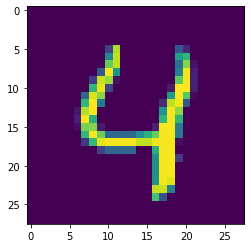

In [6]:
plt.imshow(Xtest[4])

In [7]:
np.argmax(net.predict(X_test)[4])

4

In [8]:
y_test[4]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
net.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 15us/step


[0.28649748110175133, 0.9200999736785889]

1. Softmax Regression

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

x = tf.placeholder(tf.float32,[None,784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,w)+b)

y_ = tf.placeholder(tf.float32, [None,10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0.9185


2. Support Vector Machine

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.svm import SVC
import tensorflow as tf
tf.set_random_seed(777)
from PIL import Image
import numpy as np

In [13]:
mnist = input_data.read_data_sets('MNIST_data/')
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
model = SVC(kernel='rbf', C=1.0, gamma='auto')

model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
print(model.score(x_test, y_test))

0.9439


3. Decision tree or Random forest

In [17]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [19]:
X = mnist.train.images
y = mnist.train.labels
clf=RandomForestClassifier(n_estimators=100)

In [20]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
clf.score(X,y)

1.0

In [23]:
X = mnist.train.images
y = mnist.train.labels
clf_tree=tree.DecisionTreeClassifier(max_depth=5)
clf_tree.fit(X,y)
clf_tree.score(X,y)

0.6744545454545454

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(mnist.train.images, mnist.train.labels, test_size=0.3)

In [25]:
clf_tree.fit(X_train,y_train);
clf_tree.score(X_train,y_train)

0.6765454545454546

In [26]:
y_pred_tree = clf_tree.predict(X_test)
accuracy_score(y_pred_tree, y_test)

0.6641818181818182

In [27]:
clf.fit(X_train,y_train);
clf.score(X_train,y_train)

1.0

In [28]:
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9638787878787879